In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from imblearn.under_sampling import NearMiss
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_recall_curve, precision_score,
                             recall_score)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer, OneHotEncoder,
                                   PolynomialFeatures, StandardScaler)

In [44]:
file = '../data/NASA Near-Earth Objects-CleanbyThang.csv'
df = pd.read_csv(file,index_col=0)


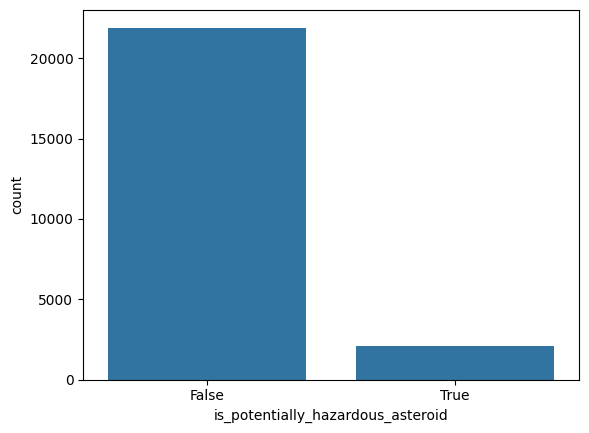

tỉ lệ vật thể là tiềm ẩn nguy hiểm: 0.08725363556814868


In [29]:
sns.countplot(data=df,x='is_potentially_hazardous_asteroid')
plt.show()

print('tỉ lệ vật thể là tiềm ẩn nguy hiểm:',df['is_potentially_hazardous_asteroid'].mean())

In [45]:
cate_train = ['orbit_class_type','is_sentry_object','is_collidable']
numeric_train = ['absolute_magnitude_h','kilometers_estimated_diameter_min','kilometers_estimated_diameter_max','perihelion_distance','first_observation_year','last_observation_year']

In [46]:
x = df[cate_train + numeric_train]
y = df['is_potentially_hazardous_asteroid']

In [47]:
# train test split

# 70% train , 15% validation, 15% test

x_temp , x_test, y_temp, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp,test_size=0.2,random_state=0)


print ("lượng dữ liệu dùng để train: ", x_train.shape[0])
print ("lượng dữ liệu dùng để validation: ", x_val.shape[0])
print ("lượng dữ liệu dùng để test: ", x_test.shape[0])

lượng dữ liệu dùng để train:  17279
lượng dữ liệu dùng để validation:  4320
lượng dữ liệu dùng để test:  2400


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit_transform(df[cate_train])
scaler = StandardScaler()
df[numeric_train] = scaler.fit_transform(df[numeric_train])





<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 71997 stored elements and shape (23999, 8)>

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cate_train),  # One-hot encoding cho các cột phân loại
        ('num', StandardScaler(), numeric_train)  # Chuẩn hóa các cột số
    ])

# Xây dựng pipeline
pipeline = Pipeline(steps=[
    ('sampling', NearMissTransformer()),  # Bước sampling với NearMiss
    ('preprocessor', preprocessor),  # Tiền xử lý dữ liệu
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', class_weight='balanced'))  # Mô hình Logistic Regression
])

# Huấn luyện mô hình
pipeline.fit(x_train, y_train)

# Đánh giá mô hình
train_score = pipeline.score(x_train, y_train)
val_score = pipeline.score(x_val, y_val)

print("Training Score:", train_score)
print("Validation Score:", val_score)

# In báo cáo phân loại cho tập kiểm tra
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))


ValueError: Expected array-like (array or non-string sequence), got None

ValueError: Expected array-like (array or non-string sequence), got None